# Aplicando algoritmo de random forest para predecir diabetes
Se utilizara el data set y trabajado de diabetes para entrenar el modelo



### 1: Carga de datos
En este caso el dataset ya viene listo para el modelo, asi que comenzaré importandolo


In [21]:
# Importo librerias que se utilizaran
import pandas as pd

total_data = pd.read_csv('../data/raw/diabetes.csv')

total_data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [22]:
from sklearn.model_selection import train_test_split

# Divido la data de entrenamiento y prueba
X = total_data.drop('Outcome', axis=1)
# Variable objeito y [outcome]
y = total_data['Outcome']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train.head()


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
60,2,84,0,0,0,0.0,0.304,21
618,9,112,82,24,0,28.2,1.282,50
346,1,139,46,19,83,28.7,0.654,22
294,0,161,50,0,0,21.9,0.254,65
231,6,134,80,37,370,46.2,0.238,46


### 2: Inicialización y entrenamiento del modelo

In [23]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)


,n_estimators,100
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


Una vez entrenado procedo a visualizar el modelo, para ello utilizare la libreria sklearn tree
y matplotlib

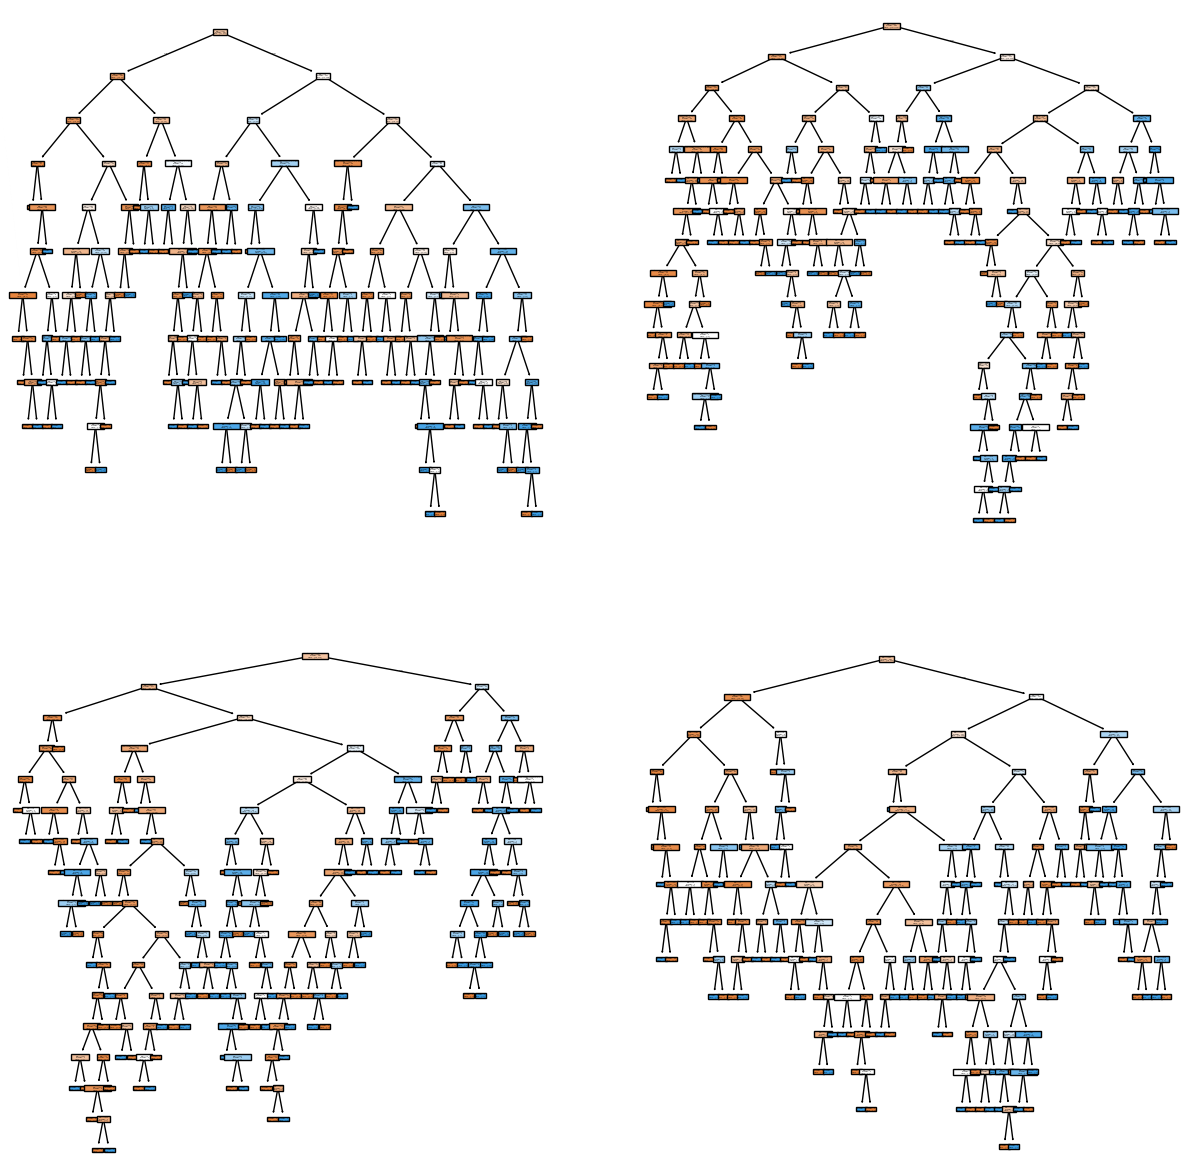

In [24]:
import matplotlib.pyplot as plt
from sklearn import tree

fig, axis = plt.subplots(2,2, figsize=(15,15))

# Mostramos los primeros 4 árboles de los 100 generados por defecto

tree.plot_tree(model.estimators_[0], ax=axis[0,0], feature_names= list(X_train.columns),  filled=True)

tree.plot_tree(model.estimators_[1], ax= axis[0,1], feature_names= list(X_train.columns), filled=True)

tree.plot_tree(model.estimators_[2], ax= axis[1,0], feature_names= list(X_train.columns),  filled=True)

tree.plot_tree(model.estimators_[3], ax = axis[1,1], feature_names= list(X_train.columns),  filled=True)

plt.show()

### 3: Predicción del modelo

In [25]:
y_pred = model.predict(X_test)
y_pred

array([0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1,
       0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0])

Ahora compararemos que tan eficaz es nuestro modelo comparandolo con los datos verdaderos, es decir aquellos que no han sido entrenados.
- Utilizaré la metrica accuaracy que representa la fracción de predicciones que hizo el modelo correctamente

In [26]:
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_test, y_pred)
accuracy

0.7207792207792207

El modelo tiene una presición del 72 % aproximadamente, por lo que es bastante bueno